# Topic Modeling with CorEx

## Setup

In [1]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle 

# sklearn
from sklearn.feature_extraction.text import CountVectorizer

# corex
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

# bespoke
from preprocessing_funcs import clean_tweet, get_hashtags, get_emojis

In [3]:
with open('../data_files/processed_tweets.pickle', 'rb') as read_file:
    df = pickle.load(read_file)

In [4]:
df.head()

,clean,processed
0,islam kills are you trying to say that there w...,islam kill try say terrorist attack europe ref...
1,clinton trump should ve apologized more attack...,clinton trump apologize attack little
2,who was is the best president of the past year...,well president past retweet
3,i don t have to guess your religion christmasa...,guess religion christmasaftermath
4,pence and his lawyers decided which of his off...,pence lawyer decide official email public can see


## Topic Modeling

In [5]:
proc_tweets = df.processed

In [7]:
vectorizer = CountVectorizer(token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True,
                             stop_words='english')

doc_word = vectorizer.fit_transform(proc_tweets)
words = list(np.asarray(vectorizer.get_feature_names()))

In [12]:
def corex_topics(topic_model):
    topics = topic_model.get_topics()
    for n,topic in enumerate(topics):
        topic_words,_ = zip(*topic)
        print('{}: '.format(n) + ', '.join(topic_words))

In [14]:
def plot_topics(topic_model):
    plt.figure(figsize=(10,5))
    plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
    plt.xlabel('Topic', fontsize=16)
    plt.ylabel('Total Correlation (nats)', fontsize=16)
    plt.show()

In [17]:
def show_top_tweets(topic_model, num_tweets_to_show):
    for i in range(len(topics)):
        print(f'Topic {i}')
        top_tweets = [tweet[0] for tweet in topic_model.get_top_docs(topic=i, n_docs=num_tweets_to_show)]
        print(top_tweets, '\n')

### No Anchors

In [9]:
topic_model = ct.Corex(n_hidden=6, 
                       words=words,
                       max_iter=200, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=proc_tweets)

In [13]:
corex_topics(topic_model)

0: merkel, muss, die, ist, das, es, sie, oscarhasnocolor, ich, mit
1: obama, kill, islam, police, isis, muslim, refugee, attack, terrorist, midnight
2: trump, donald, hillary, real, president, maga, debate, gop, supporter, poll
3: clinton, email, campaign, politic, news, fbi, new, wikileaks, post, foundation
4: tcot, pjnet, ccot, wakeupamerica, teaparty, cruzcrew, enlist, nra, patriot, tgdn
5: politician, mike, gift, pence, idea, session, john, kelly, cnn, senate


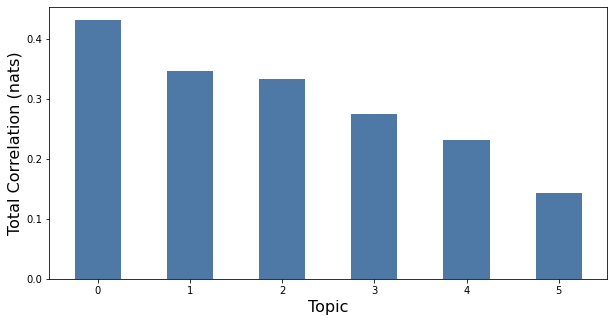

In [16]:
%matplotlib inline
plot_topics(topic_model)

In [18]:
show_top_tweets(topic_model, 5)

Topic 0
['real issue wethepeople gop thedemocrats yrnf youngcons youngdems teaparty ows justinbieber pjnet', 'ich unterst tze fast alle antr ge merkel merkel muss', 'cdu frau merkel die h chsten kompetenzwerte merkel muss', 'mittelst ndische die arbeitspl tze des merkel muss', 'il film di fly lotus chi l ha visto die che bellissimo'] 

Topic 1
['bergdahl court martial also indict barack hussein obama american thinker', 'although innocent people terror list recognize tamerian tsarnaev despite sign', 'enough yet america muslims univ md demand prayer room every build shuttle service mosque ht', 'obama say isis represent islam ex muslim son imam say isis follow islam letter ob', 'vile woman implore castro extradite want terrorist cop killer joanne chesimard'] 

Topic 2
['thank lorettalynn endorsement real donald trump trump never hillary', 'go via ap thank nh trumptrain drain swamp trump maga americafirst imvotingb trump president', 'hell empty demon earth ask real donald trump satanspawn 

In [19]:
topic_model = ct.Corex(n_hidden=12, 
                       words=words,
                       max_iter=200, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=proc_tweets)

In [20]:
corex_topics(topic_model)

0: trump, clinton, hillary, donald, real, politic, campaign, president, poll, supporter
1: merkel, muss, cruz, ted, pjnet, ist, die, cruzcrew, es, sie
2: das, feat, matthew, hurricane, gt, ber, listen, album, askem, artyoucanhear
3: midnight, play, game, ft, soundcloud, hashtag, fishtv, opiceisis, iceisis, drunkbands
4: islam, isis, kill, refugee, muslim, terrorist, muslims, attack, obama, islamic
5: email, fbi, russia, wikileaks, hack, russian, state, iran, investigation, tax
6: shoot, headline, trumps, favorite, cop, rape, officer, man, assault, san
7: tcot, maga, gop, american, america, ccot, americans, nation, democrat, lie
8: white, house, black, law, illegal, security, national, people, violence, anti
9: new, police, york, david, order, high, sheriff, school, global, federal
10: like, make, idea, look, gift, politician, good, thing, great, love
11: reallifemagicspells, teapartynews, life, theteaparty, jesus, peace, spell, christ, ilove, butihate


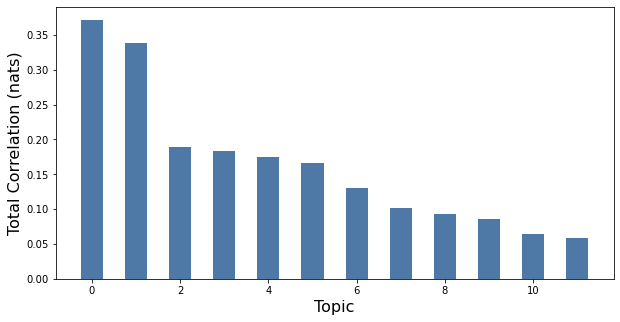

In [21]:
plot_topics(topic_model)

In [24]:
topic_model.tc

1.957922325609696

### Semi-Supervised Modeling with CorEx Anchoring

In [25]:
anchor_topics = [['donald', 'trump'],                                # trump stuff
                ['hillary', 'clinton'],                              # hillary stuff
                ['merkel', 'muss', 'die', 'ist', 'ich', 'das'],      # german stuff
                ['blacklivesmatter'],                                # BLM/race stuff
                ['police', 'officer', 'shoot'],                      # police stuff
                ['obama', 'barack'],                                 # obama stuff
                ['muslim', 'islam']                                  # isis/islam stuff
               ]

len(anchor_topics)

7

In [28]:
topic_model = ct.Corex(n_hidden=10, 
                       words=words,
                       max_iter=200, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=proc_tweets, 
                anchors=anchor_topics, anchor_strength=8)

In [29]:
corex_topics(topic_model)

0: trump, donald, real, president, politic, supporter, maga, poll, rally, say
1: clinton, hillary, email, campaign, foundation, fbi, wikileaks, debate, benghazi, crook
2: die, merkel, muss, ist, das, ich, sie, es, mit, zu
3: blacklivesmatter, play, music, ft, feat, gt, black, hiphop, mixtape, artist
4: police, shoot, officer, cop, suspect, arrest, dallas, san, man, brutality
5: obama, barack, michelle, administration, admin, legacy, hussein, malia, pres, veto
6: islam, muslim, kill, brussels, refugee, isis, prayforbrussels, opiceisis, iceisis, stop
7: tcot, gop, pjnet, news, midnight, ccot, cruz, election, state, democrat
8: favorite, headline, trumps, enlist, patriot, army, god, west, super, renewus
9: new, cnn, medium, york, oscarhasnocolor, msnbc, oscars, session, fakenews, assange


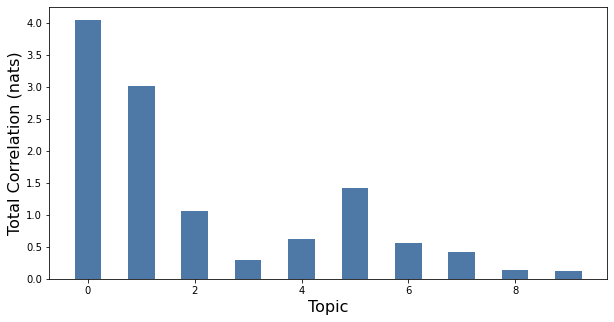

In [30]:
plot_topics(topic_model)

In [32]:
anchor_topics = [['donald', 'trump'],
                 ['donald', 'trump'],
                 ['donald', 'trump'],
                 ['donald', 'trump'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['merkel', 'muss', 'die', 'ist', 'ich', 'das'],
                 ['pjnet'], 
                 ['police', 'officer', 'cop'],
                 ['god', 'christian', 'jesus']
                ]

len(anchor_topics)

12

In [34]:
topic_model = ct.Corex(n_hidden=14, 
                       words=words,
                       max_iter=200, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=proc_tweets, 
               anchors=anchor_topics, anchor_strength=8)

In [35]:
corex_topics(topic_model)

0: trump, donald, melania, trumptrain, headline, celebrate, favorite, comment, ad, deplorables
1: trump, donald, politic, rally, inauguration, obamaswishlist, presidency, hotel, adviser, wall
2: trump, donald, real, vote, win, endorse, speech, analysis, nevertrump, criticize
3: trump, donald, president, supporter, maga, poll, trumps, tower, makeamericagreatagain, elect
4: clinton, hillary, foundation, wikileaks, debate, benghazi, pneumonia, donor, leak, chelsea
5: clinton, hillary, campaign, lie, server, birtherism, aide, investigation, corruption, camp
6: clinton, hillary, fbi, birther, blumenthal, hillarys, lockherup, humaabedin, rumor, mcclatchy
7: clinton, hillary, email, crook, conspirator, paytoplay, dcleaks, prayforflo, preparefordroning, vocabulary
8: die, merkel, muss, ist, das, ich, sie, es, mit, zu
9: pjnet, tcot, ccot, cruzcrew, wakeupamerica, teaparty, cruz, tgdn, ted, nra
10: police, cop, officer, shoot, arrest, suspect, dallas, blacklivesmatter, man, brutality
11: god, j

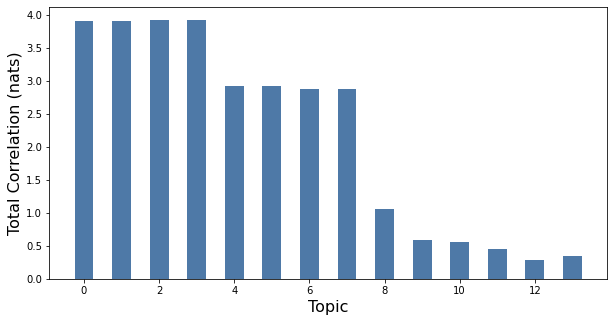

In [36]:
plot_topics(topic_model)

In [37]:
topic_model.tc

30.51231101104988